In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
from sklearn import mixture
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:ylabel='Density'>

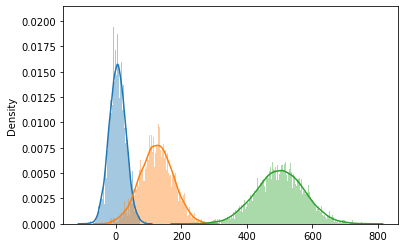

In [58]:
value1 = np.random.normal(loc=5,scale=25,size=10000)
value2 =  np.random.normal(loc=125,scale=50,size=10000)
value3 =  np.random.normal(loc=500,scale=75,size=10000)
#value4 =  np.random.normal(loc=100,scale=150,size=10000)
#value5 =  np.random.normal(loc=250,scale=79,size=10000)

#value4 =  np.random.normal(loc=1000,scale=25,size=10)
#soda = np.concatenate((value1,value2,value3,value4,value5))
soda = np.concatenate((value1,value2,value3))
sns.distplot(value1,bins=500)
sns.distplot(value2,bins=500)
sns.distplot(value3,bins=500)
#sns.distplot(value4,bins=500)
#sns.distplot(value5,bins=500)

<AxesSubplot:ylabel='Density'>

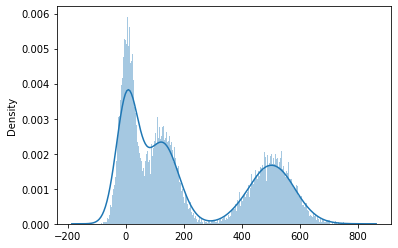

In [59]:
sns.distplot(soda,bins=500)

In [60]:
clf = mixture.GaussianMixture(n_components=3, covariance_type='full')
soda = soda.reshape(-1,1)
clf.fit(soda)
clf.covariance_type
#print(clf.covariances_)
print(np.sqrt(clf.covariances_[0][0][0]))
print(np.sqrt(clf.covariances_[1][0][0]))
print(np.sqrt(clf.covariances_[2][0][0]))

26.921579531702278
74.35123732055588
46.232932561247694


In [61]:
soda = soda.reshape(-1,1)

In [62]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(soda)
        bic.append(gmm.bic(soda))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

In [63]:
print('Weights:',best_gmm.weights_)
print('Means:\n',best_gmm.means_)
print(best_gmm.covariances_)
print(best_gmm.get_params())

Weights: [0.31028161 0.33340739 0.356311  ]
Means:
 [[130.76928279]
 [501.31944506]
 [  7.18739111]]
[2121.83622028 5529.87336137  730.1093266 ]
{'covariance_type': 'spherical', 'init_params': 'kmeans', 'max_iter': 100, 'means_init': None, 'n_components': 3, 'n_init': 1, 'precisions_init': None, 'random_state': None, 'reg_covar': 1e-06, 'tol': 0.001, 'verbose': 0, 'verbose_interval': 10, 'warm_start': False, 'weights_init': None}


In [66]:
best_gmm.get_params

<bound method BaseEstimator.get_params of GaussianMixture(covariance_type='spherical', n_components=3)>

<AxesSubplot:ylabel='Density'>

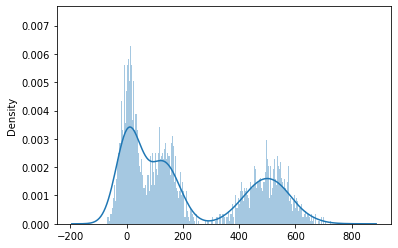

In [65]:
x,y=best_gmm.sample(10000)
sns.distplot(x,bins=1000)